[**Demo %s**](#demo-power-iter)

We will experiment with the power iteration on a 5×5 matrix with prescribed eigenvalues and dominant eigenvalue at 1.

In [2]:
λ = [1, -0.75, 0.6, -0.4, 0]
# Make a triangular matrix with eigenvalues on the diagonal.
A = triu(ones(5, 5), 1) + diagm(λ)

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run the power iteration 60 times. The best estimate of the dominant eigenvalue is the last entry of the first output.

In [3]:
β, x = FNC.poweriter(A, 60)
eigval = β[end]

1.0000000133244842

We check for linear convergence using a log-linear plot of the error.

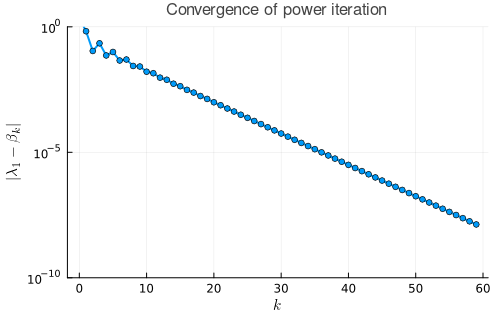

In [4]:
err = @. 1 - β
plot(0:59, abs.(err); m=:o, 
    xlabel=L"k",  
    yaxis=(L"|\lambda_1-\beta_k|", :log10, [1e-10, 1]),
    title="Convergence of power iteration")

The asymptotic trend seems to be a straight line, consistent with linear convergence. To estimate the convergence rate, we look at the ratio of two consecutive errors in the linear part of the convergence curve. The ratio of the first two eigenvalues should match the observed rate.

In [5]:
@show theory = λ[2] / λ[1];
@show observed = err[40] / err[39];

theory = λ[2] / λ[1] = -0.75


observed = err[40] / err[39] = -0.7501958338312181


Note that the error is supposed to change sign on each iteration. The effect of these alternating signs is that estimates oscillate around the exact value.

In [6]:
β[26:30]

5-element Vector{Float64}:
 1.0002364535428498
 0.9998235235523728
 1.0001328738568553
 0.9999006537033198
 1.0000746946568222

In practical situations, we don't know the exact eigenvalue that the algorithm is supposed to find. In that case we would base errors on the final $\beta$ that was found, as in the following plot.

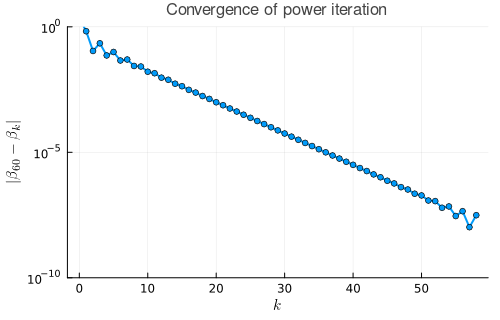

In [7]:
err = @. β[end] - β[1:end-1]
plot(0:58, abs.(err), m=:o, 
    xlabel=L"k", 
    yaxis=(L"|\beta_{60}-\beta_k|", :log10, [1e-10, 1]),
    title="Convergence of power iteration")

The results are very similar until the last few iterations, when the limited accuracy of the reference value begins to show. That is, while it is a good estimate of $\lambda_1$, it is less good as an estimate of the error in nearby estimates.